In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.metrics import plot_roc_curve, mean_absolute_percentage_error, accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [2]:
data = pd.read_csv('Bank Customer Churn Prediction.csv')
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# DATA UNDERSTANDING

In [3]:
data.shape

(10000, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [5]:
data.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
# Check the frequency distribution of categorical variables
print(f"{data['country'].value_counts()}"+"\n")
print(f"{data['gender'].value_counts()}"+"\n")
print(f"{data['tenure'].value_counts()}"+"\n")
print(f"{data['credit_card'].value_counts()}"+"\n")
print(f"{data['products_number'].value_counts()}"+"\n")
print(f"{data['churn'].value_counts()}"+"\n")
print(data['active_member'].value_counts())

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

Male      5457
Female    4543
Name: gender, dtype: int64

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: tenure, dtype: int64

1    7055
0    2945
Name: credit_card, dtype: int64

1    5084
2    4590
3     266
4      60
Name: products_number, dtype: int64

0    7963
1    2037
Name: churn, dtype: int64

1    5151
0    4849
Name: active_member, dtype: int64


In [7]:
data.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

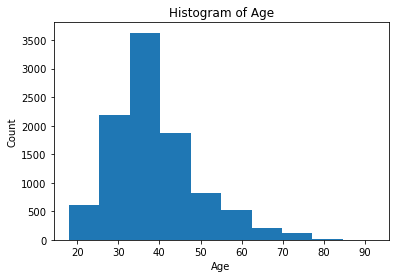

In [8]:
plt.hist(data['age'])
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

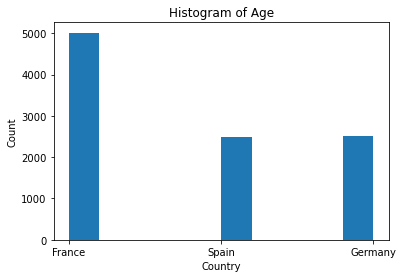

In [9]:
plt.hist(data['country'])
plt.title("Histogram of Age")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

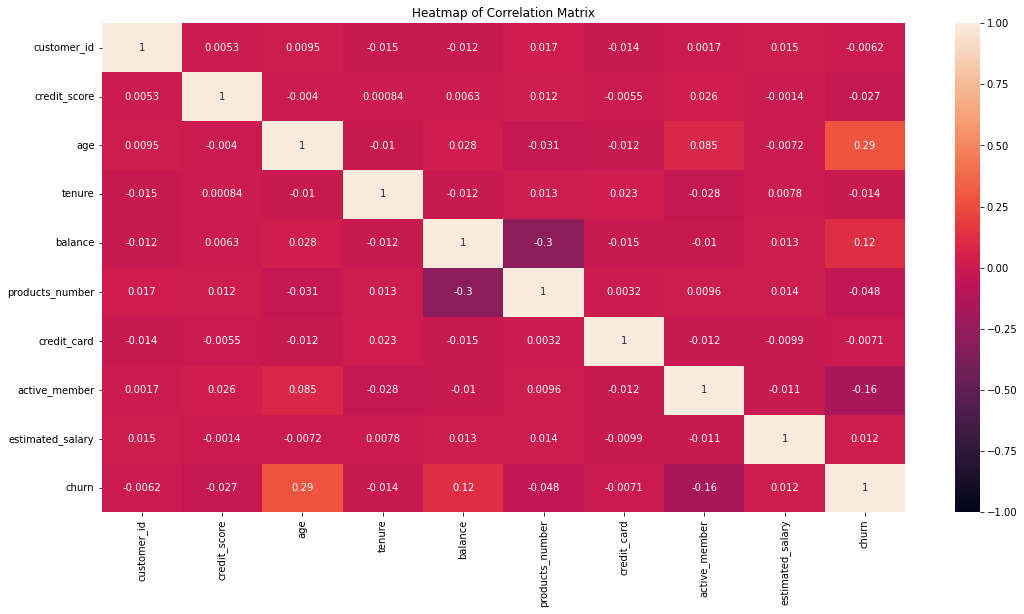

In [10]:
# Plot a heatmap of the correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(18,9))
sns.heatmap(data.corr(),xticklabels=corr_matrix.columns,yticklabels=corr_matrix.columns,vmin=-1,vmax=1,annot=True)
plt.title("Heatmap of Correlation Matrix")
plt.show()

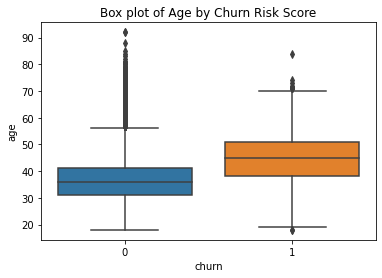

In [11]:
# Plot a boxplot of age by churn
sns.boxplot(x='churn', y='age', data=data)
plt.title("Box plot of Age by Churn Risk Score")
plt.show()

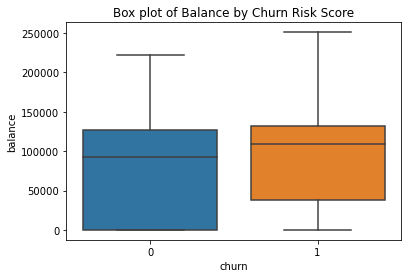

In [12]:
# Plot a boxplot of age by churn
sns.boxplot(x='churn', y='balance', data=data)
plt.title("Box plot of Balance by Churn Risk Score")
plt.show()

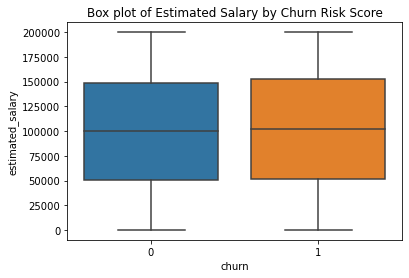

In [13]:
# Plot a boxplot of age by churn
sns.boxplot(x='churn', y='estimated_salary', data=data)
plt.title("Box plot of Estimated Salary by Churn Risk Score")
plt.show()

In [14]:
def feat_plot(feature):
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 3, 1)
    feature.plot(kind = 'hist')
    plt.title(f'{feature.name} histogram plot')
    
    #mean = feature.describe().mean()
    plt.subplot(1, 3, 2)
    mu, sigma = scipy.stats.norm.fit(feature)
    sns.distplot(feature) 
    #plt.legend({'--': mu, 'sigma': sigma})
    plt.axvline(mu, linestyle = '--', color = 'green', )
    plt.axvline(sigma, linestyle = '--', color = 'red')
    plt.title(f'{feature.name} distribution plot')
    
    plt.subplot(1, 3, 3)
    sns.boxplot(feature)
    plt.title(f'{feature.name} box plot')
    plt.show()
num_feat = data.select_dtypes(exclude = 'object')

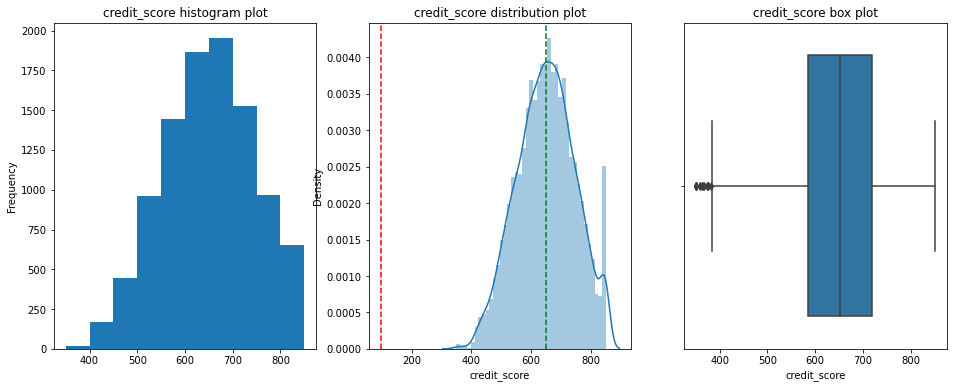

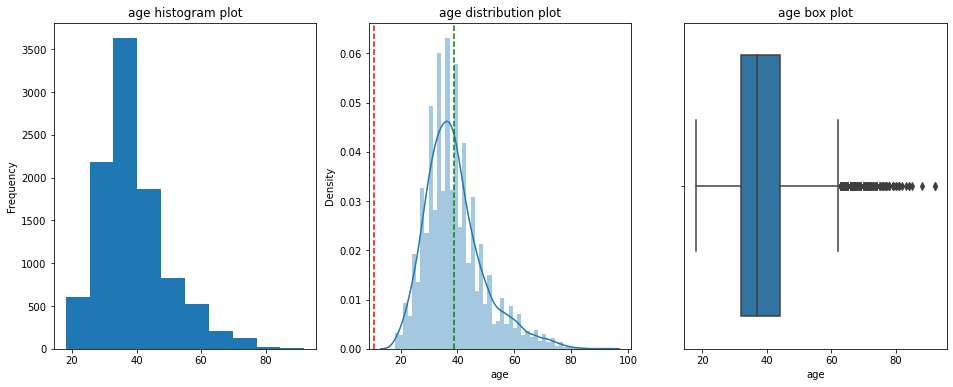

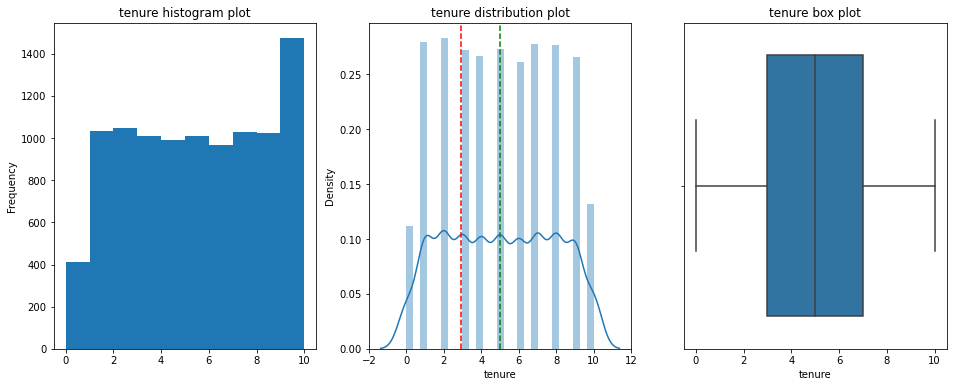

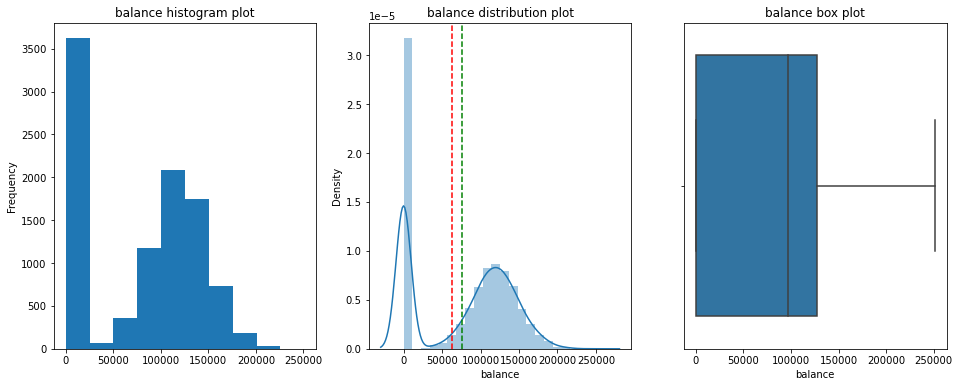

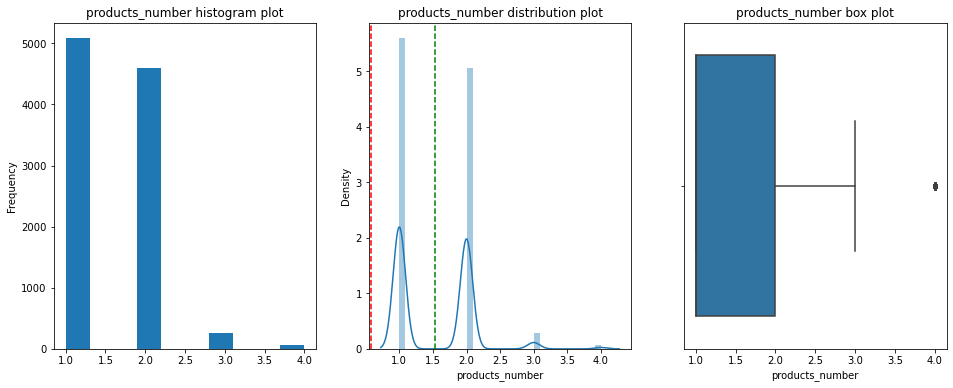

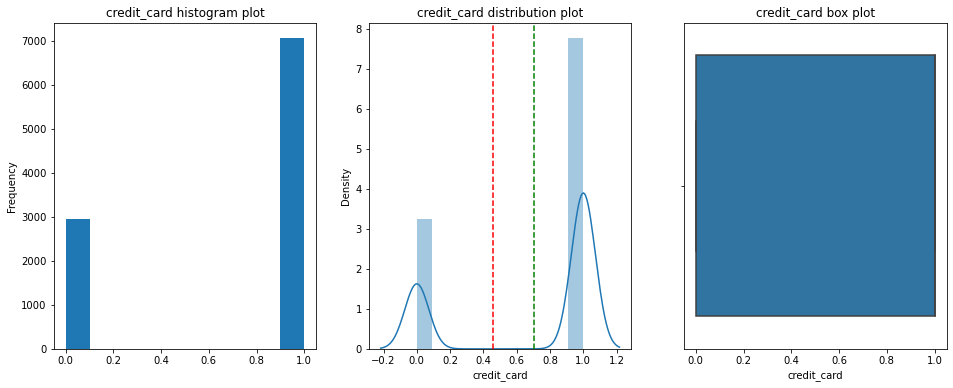

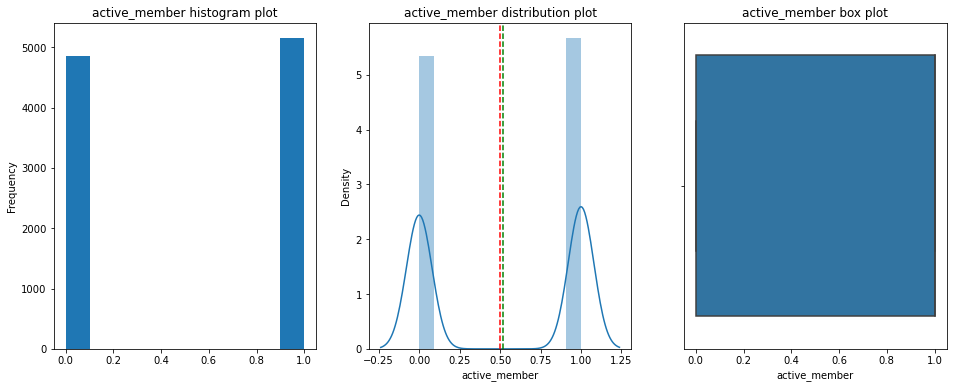

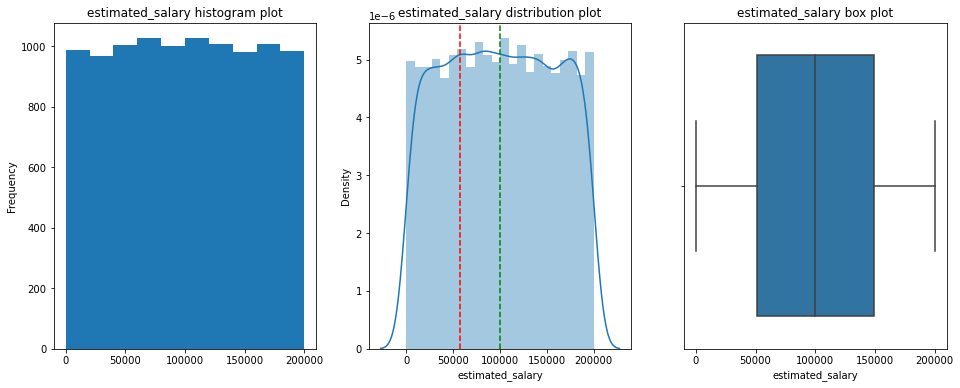

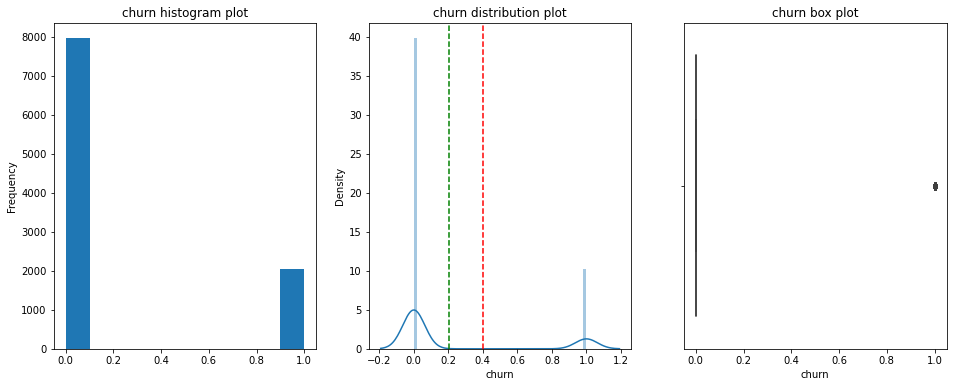

In [15]:
for i in num_feat.columns:
    if i=="customer_id":
        continue
    feat_plot(num_feat[i])

# DATA PREPARATION

In [16]:
data.churn[data.balance==0].value_counts()

0    3117
1     500
Name: churn, dtype: int64

In [17]:
# Create a LabelEncoder object
le = LabelEncoder()

# Encode categorical variables
data["gender"] = le.fit_transform(data["gender"])
data["country"] = le.fit_transform(data["country"])

# Create dummy variables for the encoded categorical columns
df_encoded = pd.get_dummies(data, columns=["gender","country"])
data=df_encoded
data.head()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,gender_0,gender_1,country_0,country_1,country_2
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1


In [18]:
#Drop unnecessary columns
data=data.drop("customer_id",axis=1)
data

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,gender_0,gender_1,country_0,country_1,country_2
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1,1,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1,1,0,0
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,1,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,1,0


In [19]:
data.dtypes

credit_score          int64
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
gender_0              uint8
gender_1              uint8
country_0             uint8
country_1             uint8
country_2             uint8
dtype: object

In [20]:
y=data['churn'].values
X=data.drop(["churn"],axis=1)

In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   age               10000 non-null  int64  
 2   tenure            10000 non-null  int64  
 3   balance           10000 non-null  float64
 4   products_number   10000 non-null  int64  
 5   credit_card       10000 non-null  int64  
 6   active_member     10000 non-null  int64  
 7   estimated_salary  10000 non-null  float64
 8   gender_0          10000 non-null  uint8  
 9   gender_1          10000 non-null  uint8  
 10  country_0         10000 non-null  uint8  
 11  country_1         10000 non-null  uint8  
 12  country_2         10000 non-null  uint8  
dtypes: float64(2), int64(6), uint8(5)
memory usage: 674.0 KB


In [22]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

# MODELLING

In [50]:
list_bank=[]

# Logistic Regression

In [24]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=63)

In [25]:
pipe = Pipeline([('Classifier', LogisticRegression())])


search_space = [{'Classifier': [LogisticRegression(solver='liblinear')],
                 'Classifier__C': np.logspace(-4, 4, 30),
                 'Classifier__penalty':['l1','l2']}]

clf = GridSearchCV(pipe, search_space, cv=5, verbose=0)

best_model = clf.fit(X_train, y_train)

best_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('Classifier',
   LogisticRegression(C=0.38566204211634725, penalty='l1', solver='liblinear'))],
 'verbose': False,
 'Classifier': LogisticRegression(C=0.38566204211634725, penalty='l1', solver='liblinear'),
 'Classifier__C': 0.38566204211634725,
 'Classifier__class_weight': None,
 'Classifier__dual': False,
 'Classifier__fit_intercept': True,
 'Classifier__intercept_scaling': 1,
 'Classifier__l1_ratio': None,
 'Classifier__max_iter': 100,
 'Classifier__multi_class': 'auto',
 'Classifier__n_jobs': None,
 'Classifier__penalty': 'l1',
 'Classifier__random_state': None,
 'Classifier__solver': 'liblinear',
 'Classifier__tol': 0.0001,
 'Classifier__verbose': 0,
 'Classifier__warm_start': False}

In [26]:
best_model.best_params_

{'Classifier': LogisticRegression(C=0.38566204211634725, penalty='l1', solver='liblinear'),
 'Classifier__C': 0.38566204211634725,
 'Classifier__penalty': 'l1'}

In [51]:
model=LogisticRegression(C=0.38566204211634725,penalty='l1',solver='liblinear')
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
dic_log={}
dic_log['name']='Logistic'
dic_log['Accuracy']=accuracy_score(y_test, y_pred)
dic_log['Precision']=precision_score(y_test, y_pred, average='weighted')
dic_log['Re-call']=recall_score(y_test, y_pred, average='weighted')
dic_log['F1-Score']=f1_score(y_test, y_pred, average='weighted')
dic_log['Cohens-Kappa']=cohen_kappa_score(y_test, y_pred)
dic_log['Mape']=mean_absolute_percentage_error(y_test, y_pred)
list_bank.append(dic_log)

Accuracy: 0.8095


# KNN

In [28]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=63)

In [29]:
pipe = Pipeline([('Classifier', KNeighborsClassifier())])


search_space = [{'Classifier': [KNeighborsClassifier()],
                 'Classifier__n_neighbors':[2,3,4,5,6]}]


clf = GridSearchCV(pipe, search_space, cv=5, verbose=0)

best_model = clf.fit(X_train, y_train)

best_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('Classifier', KNeighborsClassifier(n_neighbors=6))],
 'verbose': False,
 'Classifier': KNeighborsClassifier(n_neighbors=6),
 'Classifier__algorithm': 'auto',
 'Classifier__leaf_size': 30,
 'Classifier__metric': 'minkowski',
 'Classifier__metric_params': None,
 'Classifier__n_jobs': None,
 'Classifier__n_neighbors': 6,
 'Classifier__p': 2,
 'Classifier__weights': 'uniform'}

In [30]:
best_model.best_params_

{'Classifier': KNeighborsClassifier(n_neighbors=6),
 'Classifier__n_neighbors': 6}

In [52]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
dic_knn={}
dic_knn['name']='KNN'
dic_knn['Accuracy']=accuracy_score(y_test, y_pred)
dic_knn['Precision']=precision_score(y_test, y_pred, average='weighted')
dic_knn['Re-call']=recall_score(y_test, y_pred, average='weighted')
dic_knn['F1-Score']=f1_score(y_test, y_pred, average='weighted')
dic_knn['Cohens-Kappa']=cohen_kappa_score(y_test, y_pred)
dic_knn['Mape']=mean_absolute_percentage_error(y_test, y_pred)
list_bank.append(dic_knn)

Accuracy: 0.789


# Random Forest Classifier

In [32]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=63)

In [33]:
pipe = Pipeline([('Classifier', RandomForestClassifier())])


search_space = [{'Classifier': [RandomForestClassifier(random_state=63)],
                 'Classifier__n_estimators': [100, 200,300,400,500,600],
                 'Classifier__max_features': [3,4,5,6,7]}]


clf = GridSearchCV(pipe, search_space, cv=5, verbose=0)

best_model = clf.fit(X_train, y_train)

best_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('Classifier',
   RandomForestClassifier(max_features=4, n_estimators=600, random_state=63))],
 'verbose': False,
 'Classifier': RandomForestClassifier(max_features=4, n_estimators=600, random_state=63),
 'Classifier__bootstrap': True,
 'Classifier__ccp_alpha': 0.0,
 'Classifier__class_weight': None,
 'Classifier__criterion': 'gini',
 'Classifier__max_depth': None,
 'Classifier__max_features': 4,
 'Classifier__max_leaf_nodes': None,
 'Classifier__max_samples': None,
 'Classifier__min_impurity_decrease': 0.0,
 'Classifier__min_impurity_split': None,
 'Classifier__min_samples_leaf': 1,
 'Classifier__min_samples_split': 2,
 'Classifier__min_weight_fraction_leaf': 0.0,
 'Classifier__n_estimators': 600,
 'Classifier__n_jobs': None,
 'Classifier__oob_score': False,
 'Classifier__random_state': 63,
 'Classifier__verbose': 0,
 'Classifier__warm_start': False}

In [34]:
best_model.best_params_

{'Classifier': RandomForestClassifier(max_features=4, n_estimators=600, random_state=63),
 'Classifier__max_features': 4,
 'Classifier__n_estimators': 600}

In [53]:
clf=RandomForestClassifier(random_state=63,n_estimators=600,max_features=4)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
dic_rnd={}
dic_rnd['name']='Random Forest'
dic_rnd['Accuracy']=accuracy_score(y_test, y_pred)
dic_rnd['Precision']=precision_score(y_test, y_pred, average='weighted')
dic_rnd['Re-call']=recall_score(y_test, y_pred, average='weighted')
dic_rnd['F1-Score']=f1_score(y_test, y_pred, average='weighted')
dic_rnd['Cohens-Kappa']=cohen_kappa_score(y_test, y_pred)
dic_rnd['Mape']=mean_absolute_percentage_error(y_test, y_pred)
list_bank.append(dic_rnd)

Accuracy: 0.866


# Decision Tree Classifier

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=63)

In [37]:
pipe = Pipeline([('Classifier', DecisionTreeClassifier())])


search_space = {
    'Classifier__max_depth': [3, 5, 7],
    'Classifier__min_samples_split': [2, 4, 6],
    'Classifier__min_samples_leaf': [1, 2, 3]
}

clf = GridSearchCV(pipe, search_space, cv=5, verbose=0)

best_model = clf.fit(X_train, y_train)

best_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('Classifier',
   DecisionTreeClassifier(max_depth=5, min_samples_leaf=3))],
 'verbose': False,
 'Classifier': DecisionTreeClassifier(max_depth=5, min_samples_leaf=3),
 'Classifier__ccp_alpha': 0.0,
 'Classifier__class_weight': None,
 'Classifier__criterion': 'gini',
 'Classifier__max_depth': 5,
 'Classifier__max_features': None,
 'Classifier__max_leaf_nodes': None,
 'Classifier__min_impurity_decrease': 0.0,
 'Classifier__min_impurity_split': None,
 'Classifier__min_samples_leaf': 3,
 'Classifier__min_samples_split': 2,
 'Classifier__min_weight_fraction_leaf': 0.0,
 'Classifier__random_state': None,
 'Classifier__splitter': 'best'}

In [54]:
clf = DecisionTreeClassifier(max_depth=5, min_samples_split=2, min_samples_leaf=3)
clf.fit(X_train,y_train)
predictions = model.predict(X_test)
clf.score(X_test,y_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
dic_dct={}
dic_dct['name']='Decision Tree'
dic_dct['Accuracy']=accuracy_score(y_test, y_pred)
dic_dct['Precision']=precision_score(y_test, y_pred, average='weighted')
dic_dct['Re-call']=recall_score(y_test, y_pred, average='weighted')
dic_dct['F1-Score']=f1_score(y_test, y_pred, average='weighted')
dic_dct['Cohens-Kappa']=cohen_kappa_score(y_test, y_pred)
dic_dct['Mape']=mean_absolute_percentage_error(y_test, y_pred)
list_bank.append(dic_dct)

Accuracy: 0.866


# Naive Bayes Classifier

In [39]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=63)
pipe=Pipeline([('classifier', GaussianNB())])
search_space = {
    'classifier__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
}
grid = GridSearchCV(pipe,search_space,refit=True,verbose=2,scoring='accuracy',cv=5)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ....................classifier__var_smoothing=1e-09; total time=   0.0s
[CV] END ....................classifier__var_smoothing=1e-09; total time=   0.0s
[CV] END ....................classifier__var_smoothing=1e-09; total time=   0.0s
[CV] END ....................classifier__var_smoothing=1e-09; total time=   0.0s
[CV] END ....................classifier__var_smoothing=1e-09; total time=   0.0s
[CV] END ....................classifier__var_smoothing=1e-08; total time=   0.0s
[CV] END ....................classifier__var_smoothing=1e-08; total time=   0.0s
[CV] END ....................classifier__var_smoothing=1e-08; total time=   0.0s
[CV] END ....................classifier__var_smoothing=1e-08; total time=   0.0s
[CV] END ....................classifier__var_smoothing=1e-08; total time=   0.0s
[CV] END ....................classifier__var_smoothing=1e-07; total time=   0.0s
[CV] END ....................classifier__var_smoo

GridSearchCV(cv=5, estimator=Pipeline(steps=[('classifier', GaussianNB())]),
             param_grid={'classifier__var_smoothing': [1e-09, 1e-08, 1e-07,
                                                       1e-06, 1e-05, 0.0001,
                                                       0.001, 0.01]},
             scoring='accuracy', verbose=2)

In [40]:
grid.best_params_

{'classifier__var_smoothing': 1e-07}

In [55]:
clf=GaussianNB(var_smoothing= 1e-07)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
dic_nbc={}
dic_nbc['name']='Naive Bayes'
dic_nbc['Accuracy']=accuracy_score(y_test, y_pred)
dic_nbc['Precision']=precision_score(y_test, y_pred, average='weighted')
dic_nbc['Precision']=precision_score(y_test, y_pred, average='weighted')
dic_nbc['Re-call']=recall_score(y_test, y_pred, average='weighted')
dic_nbc['F1-Score']=f1_score(y_test, y_pred, average='weighted')
dic_nbc['Cohens-Kappa']=cohen_kappa_score(y_test, y_pred)
dic_nbc['Mape']=mean_absolute_percentage_error(y_test, y_pred)
list_bank.append(dic_nbc)

Accuracy: 0.801


# EVALUATION

In [56]:
results=pd.DataFrame(list_bank)
results

,name,Accuracy,Precision,Re-call,F1-Score,Cohens-Kappa,Mape
0,Logistic,0.8095,0.775409,0.8095,0.772552,0.216845,1.463670e+14
1,KNN,0.7890,0.698630,0.7890,0.718937,0.019763,8.782019e+13
2,Random Forest,0.8660,0.857457,0.8660,0.852556,0.505973,1.238490e+14
3,Decision Tree,0.8660,0.857457,0.8660,0.852556,0.505973,1.238490e+14
4,Naive Bayes,0.8010,0.641601,0.8010,0.712494,0.000000,1.990000e-01
